In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [2]:
transform = transforms.Compose(
    [transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]
)

batch_size = 4

trainset = torchvision.datasets.CIFAR10(
    root="./data", train=True, download=True, transform=transform
)
trainloader = torch.utils.data.DataLoader(
    trainset, batch_size=batch_size, shuffle=True, num_workers=2
)

testset = torchvision.datasets.CIFAR10(
    root="./data", train=False, download=True, transform=transform
)
testloader = torch.utils.data.DataLoader(
    testset, batch_size=batch_size, shuffle=False, num_workers=2
)

classes = (
    "plane",
    "car",
    "bird",
    "cat",
    "deer",
    "dog",
    "frog",
    "horse",
    "ship",
    "truck",
)

Files already downloaded and verified
Files already downloaded and verified


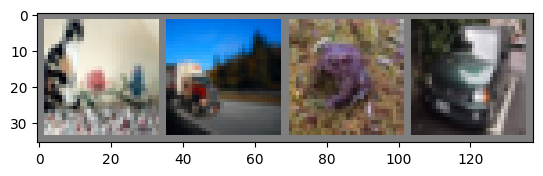

cat   truck frog  car  


In [3]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(" ".join(f"{classes[labels[j]]:5s}" for j in range(batch_size)))

In [4]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [5]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

In [6]:
num_epochs = 30
train_losses = []  # To store training losses
train_acc_list = []  # To store training accuracies
test_acc_list = []  # To store test accuracies

for epoch in range(num_epochs):
    running_loss = 0.0  # for mini-batch prints
    epoch_loss = 0.0  # for average epoch loss
    net.train()

    for i, (inputs, labels) in enumerate(trainloader, 0):
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        epoch_loss += loss.item()  # accumulate total loss for epoch

        # Print statistics every 2000 mini-batches
        if i % 2000 == 1999:
            print(
                f"[{epoch + 1}, {i + 1:5d}] mini-batch loss: {running_loss / 2000:.3f}"
            )
            running_loss = 0.0

    # Average loss for the epoch
    avg_loss = epoch_loss / len(trainloader)
    train_losses.append(avg_loss)

    # Training accuracy
    correct = 0
    total = 0
    net.eval()
    with torch.no_grad():
        for inputs, labels in trainloader:
            outputs = net(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    train_acc = 100 * correct / total
    train_acc_list.append(train_acc)

    # Test accuracy
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in testloader:
            outputs = net(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    test_acc = 100 * correct / total
    test_acc_list.append(test_acc)


print("Finished Training")

[1,  2000] mini-batch loss: 1.987
[1,  4000] mini-batch loss: 1.719
[1,  6000] mini-batch loss: 1.582
[1,  8000] mini-batch loss: 1.506
[1, 10000] mini-batch loss: 1.418
[1, 12000] mini-batch loss: 1.343
[2,  2000] mini-batch loss: 1.272
[2,  4000] mini-batch loss: 1.235
[2,  6000] mini-batch loss: 1.221
[2,  8000] mini-batch loss: 1.200
[2, 10000] mini-batch loss: 1.150
[2, 12000] mini-batch loss: 1.159
[3,  2000] mini-batch loss: 1.066
[3,  4000] mini-batch loss: 1.060
[3,  6000] mini-batch loss: 1.088
[3,  8000] mini-batch loss: 1.048
[3, 10000] mini-batch loss: 1.041
[3, 12000] mini-batch loss: 1.036
[4,  2000] mini-batch loss: 0.962
[4,  4000] mini-batch loss: 0.986
[4,  6000] mini-batch loss: 0.961
[4,  8000] mini-batch loss: 0.976


KeyboardInterrupt: 

In [ ]:
PATH = "./cifar_netq6.pth"
torch.save(net.state_dict(), PATH)

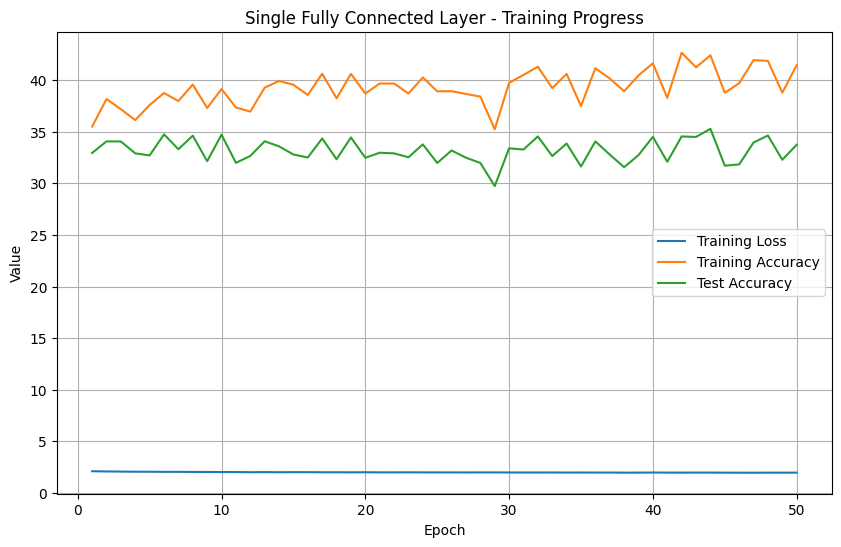

In [ ]:
epochs = range(1, num_epochs + 1)
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_losses, label="Training Loss")
plt.plot(epochs, train_acc_list, label="Training Accuracy")
plt.plot(epochs, test_acc_list, label="Test Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Value")
plt.title("Deeper CNN Model - Training Progress")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
total_params = sum(p.numel() for p in net.parameters())
print(f"Total number of parameters: {total_params}")

Total number of parameters: 30730


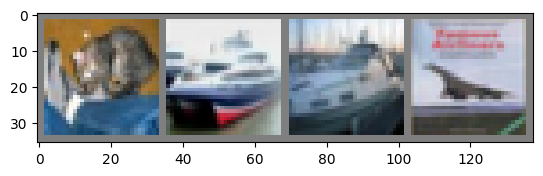

GroundTruth:  cat   ship  ship  plane


In [ ]:
dataiter = iter(testloader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print("GroundTruth: ", " ".join(f"{classes[labels[j]]:5s}" for j in range(4)))

In [ ]:
net = Net()
net.load_state_dict(torch.load(PATH, weights_only=True))

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


<All keys matched successfully>

In [ ]:
outputs = net(images)

In [ ]:
_, predicted = torch.max(outputs, 1)

print("Predicted: ", " ".join(f"{classes[predicted[j]]:5s}" for j in range(4)))

Predicted:  cat   truck plane plane


In [ ]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Accuracy of the network on the 10000 test images: {100 * correct // total} %")

Accuracy of the network on the 10000 test images: 33 %


In [ ]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f"Accuracy for class: {classname:5s} is {accuracy:.1f} %")

Accuracy for class: plane is 40.4 %
Accuracy for class: car   is 33.1 %
Accuracy for class: bird  is 28.9 %
Accuracy for class: cat   is 13.7 %
Accuracy for class: deer  is 26.6 %
Accuracy for class: dog   is 29.7 %
Accuracy for class: frog  is 47.1 %
Accuracy for class: horse is 38.7 %
Accuracy for class: ship  is 41.8 %
Accuracy for class: truck is 37.3 %


In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Assuming that we are on a CUDA machine, this should print a CUDA device:

print(device)

cpu
